# Load libraries

In [39]:
library(caTools)
library(ggplot2)
source("~/src/jupyterrutils/VisualizationUtils.R")

[1] "Loading module to 'visutil' and 'vu'"


# Loading the data

After downloading the folder structure, and the data related to this lecture.

In [1]:
dataset = read.csv("../machine_learning_template_folder/Part 1 - Data Preprocessing/Data_Preprocessing/Data.csv")

In [2]:
dataset

Country,Age,Salary,Purchased
France,44,72000,No
Spain,27,48000,Yes
Germany,30,54000,No
Spain,38,61000,No
Germany,40,NA,Yes
France,35,58000,Yes
Spain,NA,52000,No
France,48,79000,Yes
Germany,50,83000,No
France,37,67000,Yes


# Replacing missing values

Nice way to replace value by calculating average of other values:

```
ave(dataset$Age, FUN=function(x) mean(x, na.rm=T))
```

Is the `ifelse` nice in context, or just confusing?

In [3]:
dataset$Age = ifelse(is.na(dataset$Age),
                     ave(dataset$Age, FUN=function(x) mean(x, na.rm=T)),
                     dataset$Age)

dataset$Salary = ifelse(is.na(dataset$Salary),
                     ave(dataset$Salary, FUN=function(x) mean(x, na.rm=T)),
                     dataset$Salary)

dataset

Country,Age,Salary,Purchased
France,44.00000,72000.00,No
Spain,27.00000,48000.00,Yes
Germany,30.00000,54000.00,No
Spain,38.00000,61000.00,No
Germany,40.00000,63777.78,Yes
France,35.00000,58000.00,Yes
Spain,38.77778,52000.00,No
France,48.00000,79000.00,Yes
Germany,50.00000,83000.00,No
France,37.00000,67000.00,Yes


# Categorical variables

Categorical: Encoding text into numbers.

In [7]:
fdataset <- dataset
fdataset$Country <- factor(fdataset$Country, 
                            levels=c('France', 'Spain', 'Germany'),
                            labels=c(1, 2, 3))

fdataset$Purchased <- factor(fdataset$Purchased,
                            levels=c('No', 'Yes'),
                            labels=c(0, 1))
str(fdataset)

'data.frame':	10 obs. of  4 variables:
 $ Country  : Factor w/ 3 levels "1","2","3": 1 2 3 2 3 1 2 1 3 1
 $ Age      : num  44 27 30 38 40 ...
 $ Salary   : num  72000 48000 54000 61000 63778 ...
 $ Purchased: Factor w/ 2 levels "0","1": 1 2 1 1 2 2 1 2 1 2


# Splitting dataset into training and test

Any machine learning model wants the data split in two sets. One for learning, and one for validate the learning.

In [17]:
set.seed(123)
split <- sample.split(fdataset$Purchased, SplitRatio=0.8)

training_set <- subset(fdataset, split==T)
test_set <- subset(fdataset, split==F)


In [18]:
training_set
test_set

,Country,Age,Salary,Purchased
1,1,44.00000,72000.00,0
2,2,27.00000,48000.00,1
3,3,30.00000,54000.00,0
4,2,38.00000,61000.00,0
5,3,40.00000,63777.78,1
7,2,38.77778,52000.00,0
8,1,48.00000,79000.00,1
10,1,37.00000,67000.00,1


,Country,Age,Salary,Purchased
6,1,35,58000,1
9,3,50,83000,0


# Feature scaling

Why scaling? For age and salary - some models use euclidian distance. As the scales are way of here the difference will be dominated by the salary distance.

**Standardization** - scaling to standard distribution size, centered around zero.

```
x_stand = (x - mean(x)) / std(x)
```

**Normalization** - scaling it down to 0 - 1 range?

```
x_norm = (x - min(x)) / (max(x) - min(x))
```



## Exploration

Note how shape of histogram is identical for raw and normalized, while the standardization transforms the data!

In [49]:
x <- sample(x=seq(1,100,1), size = 100, replace = T)
df <- data.frame(x=x)
df$standardized <- (x - mean(x)) / sd(x)
df$normalized <- (x - min(x)) / (max(x) - min(x))
df$scaled <- scale(x)
head(df)

x,standardized,normalized,scaled
1,-1.6885658,0.00000000,-1.6885658
6,-1.5129662,0.05154639,-1.5129662
87,1.3317474,0.88659794,1.3317474
58,0.3132697,0.58762887,0.3132697
32,-0.5998482,0.31958763,-0.5998482
96,1.6478266,0.97938144,1.6478266


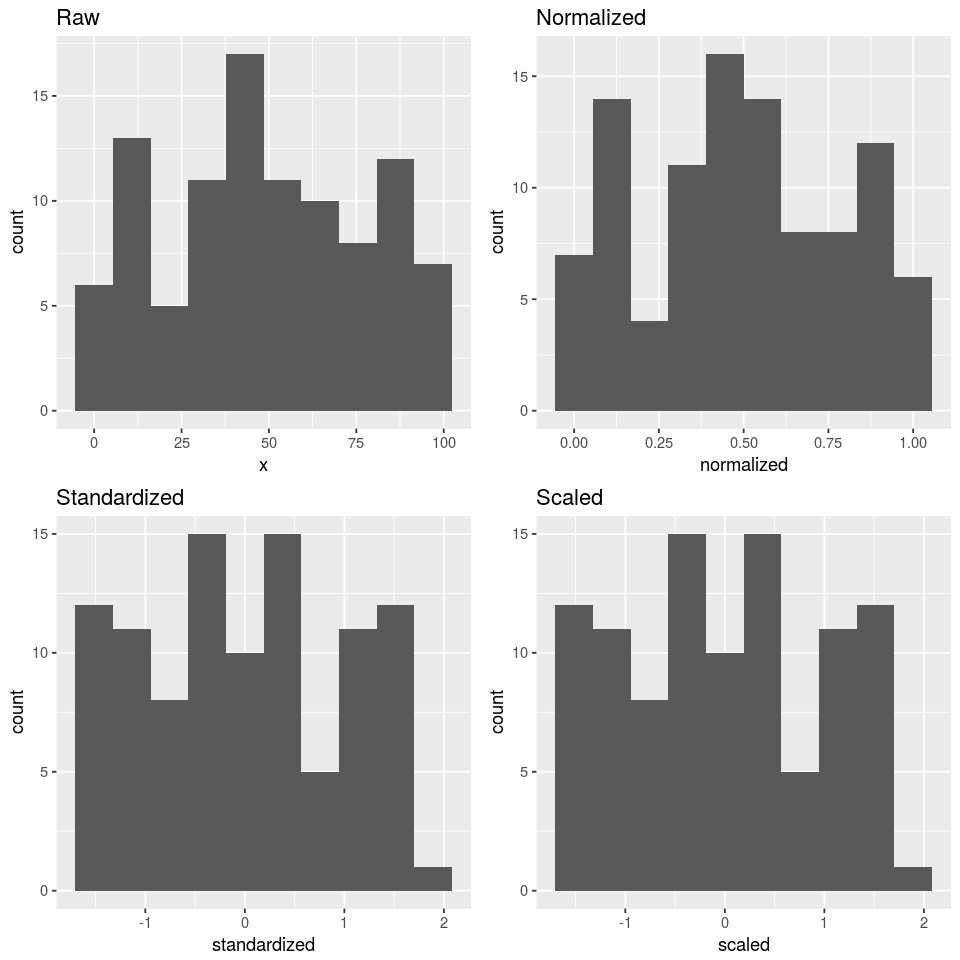

In [52]:
vu$pltsize(8, 8)
raw_plt <- ggplot(df, aes(x)) + geom_histogram(bins=10) + ggtitle("Raw")
stand_plt <- ggplot(df, aes(standardized)) + geom_histogram(bins=10) + ggtitle("Standardized")
norm_plt <- ggplot(df, aes(normalized)) + geom_histogram(bins=10) + ggtitle("Normalized")
scaled_plt <- ggplot(df, aes(scaled)) + geom_histogram(bins=10) + ggtitle("Scaled")
vu$multiplot(raw_plt, stand_plt, norm_plt, scaled_plt, cols=2)

## Course example - Scaling test and training sets

We only want to scale the non-factor columns.

In [29]:
scaled_training_set <- scale(training_set[, 2:3])
scaled_test_set <- scale(test_set[, 2:3])

In [31]:
?scale

In [53]:
scaled_training_set
scaled_test_set

,Age,Salary
1,0.90101716,0.9392746
2,-1.58847494,-1.3371160
3,-1.14915281,-0.7680183
4,0.02237289,-0.1040711
5,0.31525431,0.1594000
7,0.13627122,-0.9577176
8,1.48678000,1.6032218
10,-0.12406783,0.4650265


,Age,Salary
6,-0.7071068,-0.7071068
9,0.7071068,0.7071068


# Data preprocessing template

```
library(caTools)
library(ggplot2)
source("~/src/jupyterutils/VisualizationUtils.R")

target_cols <- c(2,3)

dataset <- read.csv('my_data.csv')
# dataset <- dataset[, target_cols]  # Select columns of interest

set.seed(123)
split <- sample.split(dataset$Purchased, splitRatio=0.8)
training_set <- sample.split(dataset$Purchased, splitRatio=0.8)
test_set <- sample.split(dataset$Purchased, splitRatio=0.2)

# training_set 
# training_set[, target_cols] <- scale(training_set[, target_cols])
# test_set[, target_cols] <- scale(test_set[, target_cols])
```